<a href="https://colab.research.google.com/github/a-cuc/CPE312/blob/main/Midterm/HOA%204.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 312
Code Title: | Predictive Analytics using Machine Learning
1st Semester | AY 2024-2025
<u>**Hands-On Activity 4.2** | **Support Vector Machines**
**Name** | Cu, Angelo Luis C.
**Section** | CPE31S3
**Date Performed**: | 10/3/2024
**Date Submitted**: | 10/3/2024
**Instructor**: | Dr. Alonica Villanueva

<hr>

# Activity 4.1 Support Vector Machines

Objective(s):

This activity aims to perform classification  using Support Vector Machines

Intended Learning Outcomes (ILOs):
* Build the model using Support Vector Machines.
* Evaluate the performance of the model.
* Choose the best parameters using Grid Search.

Resources:
* Jupyter Notebook
* Breast Cancer

Procedure:

Import the libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Use the built in breast cancer dataset from Scikit Learn

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer = load_breast_cancer()

The data set is presented in a dictionary form:

In [ ]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

We can grab information and arrays out of this dictionary to set up our data frame and understanding of the features:

In [ ]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [ ]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

Setup the dataframe using Pandas

In [ ]:
df_feat = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
cancer['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
df_target = pd.DataFrame(cancer['target'],columns=['Cancer'])

In [ ]:
df_feat.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Split the data into a training set and a testing set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, np.ravel(df_target), test_size=0.30, random_state=101)

Train the Support Vector Classifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC()

In [ ]:
model.fit(X_train,y_train)

SVC()

Now let's predict using the trained model.

In [ ]:
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,predictions))

[[ 56  10]
 [  3 102]]


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



Finding the right parameters (like what C or gamma values to use) is a tricky task! But luckily, we can be a little lazy and just try a bunch of combinations and see what works best! This idea of creating a 'grid' of parameters and just trying out all the possible combinations is called a Gridsearch, this method is common enough that Scikit-learn has this functionality built in with GridSearchCV! The CV stands for cross-validation which is the

GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested.

In [ ]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [ ]:
from sklearn.model_selection import GridSearchCV

One of the great things about GridSearchCV is that it is a meta-estimator. It takes an estimator like SVC, and creates a new estimator, that behaves exactly the same - in this case, like a classifier. You should add refit=True and choose verbose to whatever number you want, higher the number, the more verbose (verbose just means the text output describing the process).

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

What fit does is a bit more involved then usual. First, it runs the same loop with cross-validation, to find the best parameter combination. Once it has the best combination, it runs fit again on all data passed to fit (without cross-validation), to built a single new model using the best parameter setting.

In [ ]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.637 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.637 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.637 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.637 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.633 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.633 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.637 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

You can inspect the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best\_estimator_ attribute:

In [ ]:
grid.best_params_

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

In [ ]:
grid.best_estimator_

SVC(C=1, gamma=0.0001)

Then you can re-run predictions on this grid object just like you would with a normal model.

In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,grid_predictions))

[[ 59   7]
 [  4 101]]


In [ ]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        66
           1       0.94      0.96      0.95       105

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



Supplementary Activity:
* Choose your own dataset
* Import the dataset
* Determine the number of datapoints, columns and data types
* Remove unneccesary columns
* Do data cleaning such as removing empty values(NaN), replacing missing data .
* Standardize the variables.
* Perform descriptive statistics such as mean, median and mode
* Perform data visualization
* Build the model using SVM.
* Evaluate the model using classification report, accuracy , confusion matrix and roc_auc_score
* Determine the best parameter using grid search.


In [ ]:
# The dataset that I have chosen is the Room Occupancy using IoT dataset
# Link: https://www.kaggle.com/datasets/kukuroo3/room-occupancy-detection-data-iot-sensor
df = pd.read_csv('Occupancy.csv')
df

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.7000,26.2720,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:59,23.7180,26.2900,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.7300,26.2300,572.666667,769.666667,0.004765,1
3,2015-02-02 14:22:00,23.7225,26.1250,493.750000,774.750000,0.004744,1
4,2015-02-02 14:23:00,23.7540,26.2000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
20555,2015-02-18 09:15:00,20.8150,27.7175,429.750000,1505.250000,0.004213,1
20556,2015-02-18 09:16:00,20.8650,27.7450,423.500000,1514.500000,0.004230,1
20557,2015-02-18 09:16:59,20.8900,27.7450,423.500000,1521.500000,0.004237,1
20558,2015-02-18 09:17:59,20.8900,28.0225,418.750000,1632.000000,0.004279,1


In [ ]:
df.info()
# It can be seen that there are 6 features and 1 target columns
# with 1 feature being an object datatype, 5 features being float, and 1 target being int
# There are also 20,560 initial datapoints

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20560 entries, 0 to 20559
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           20560 non-null  object 
 1   Temperature    20560 non-null  float64
 2   Humidity       20560 non-null  float64
 3   Light          20560 non-null  float64
 4   CO2            20560 non-null  float64
 5   HumidityRatio  20560 non-null  float64
 6   Occupancy      20560 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.1+ MB


In [ ]:
# I decided to drop the date feature to simplify the processing
df.drop(['date'], axis=1, inplace=True)
df

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.7000,26.2720,585.200000,749.200000,0.004764,1
1,23.7180,26.2900,578.400000,760.400000,0.004773,1
2,23.7300,26.2300,572.666667,769.666667,0.004765,1
3,23.7225,26.1250,493.750000,774.750000,0.004744,1
4,23.7540,26.2000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...
20555,20.8150,27.7175,429.750000,1505.250000,0.004213,1
20556,20.8650,27.7450,423.500000,1514.500000,0.004230,1
20557,20.8900,27.7450,423.500000,1521.500000,0.004237,1
20558,20.8900,28.0225,418.750000,1632.000000,0.004279,1


<Axes: >

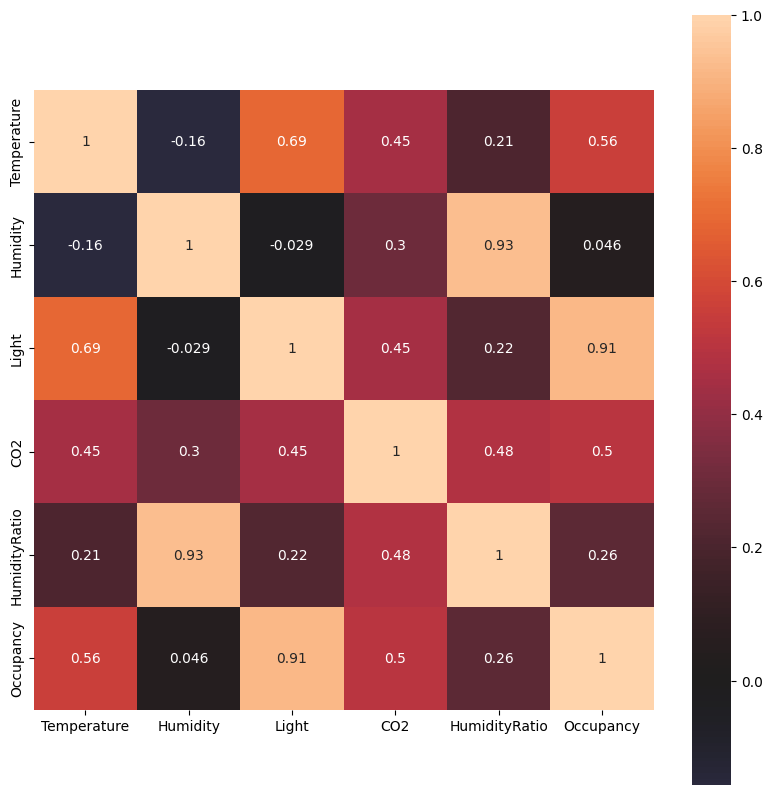

In [ ]:
# Plots the correlations of each variable
plt.figure(figsize=(10,10))
sns.heatmap(
    df.sort_index().corr(),
    annot=True, center=0, square=True
)
# It can be noticed the correlations between features and target are already high except the humidity,
# Therefore it might be better to drop the humidity feature for the model to be more accurate

In [ ]:
df.drop(['Humidity'], axis=1, inplace=True)
df

,Temperature,Light,CO2,HumidityRatio,Occupancy
0,23.7000,585.200000,749.200000,0.004764,1
1,23.7180,578.400000,760.400000,0.004773,1
2,23.7300,572.666667,769.666667,0.004765,1
3,23.7225,493.750000,774.750000,0.004744,1
4,23.7540,488.600000,779.000000,0.004767,1
...,...,...,...,...,...
20555,20.8150,429.750000,1505.250000,0.004213,1
20556,20.8650,423.500000,1514.500000,0.004230,1
20557,20.8900,423.500000,1521.500000,0.004237,1
20558,20.8900,418.750000,1632.000000,0.004279,1


In [ ]:
# Checks for duplicated values
df[df.duplicated()].shape[0]

1441

In [ ]:
# Removes duplicates
df.drop_duplicates(inplace=True)
df

,Temperature,Light,CO2,HumidityRatio,Occupancy
0,23.7000,585.200000,749.200000,0.004764,1
1,23.7180,578.400000,760.400000,0.004773,1
2,23.7300,572.666667,769.666667,0.004765,1
3,23.7225,493.750000,774.750000,0.004744,1
4,23.7540,488.600000,779.000000,0.004767,1
...,...,...,...,...,...
20555,20.8150,429.750000,1505.250000,0.004213,1
20556,20.8650,423.500000,1514.500000,0.004230,1
20557,20.8900,423.500000,1521.500000,0.004237,1
20558,20.8900,418.750000,1632.000000,0.004279,1


In [ ]:
# Standardize the variables
# Using StandardScaler()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('Occupancy',axis=1))
scaled_features = scaler.transform(df.drop('Occupancy',axis=1))
X_scaled = pd.DataFrame(scaled_features,columns=df.columns[:-1])
X_scaled

,Temperature,Light,CO2,HumidityRatio
0,2.579070,2.068302,0.145933,0.682903
1,2.596039,2.036675,0.181367,0.694053
2,2.607352,2.010009,0.210685,0.684201
3,2.600281,1.642966,0.226767,0.656151
4,2.629977,1.619013,0.240213,0.686092
...,...,...,...,...
19114,-0.140637,1.345300,2.537880,-0.040288
19115,-0.093501,1.316231,2.567145,-0.017598
19116,-0.069934,1.316231,2.589291,-0.008996
19117,-0.069934,1.294138,2.938885,0.046985


In [ ]:
# Perform descriptive statistics such as mean, median and mode
X_scaled.describe()

,Temperature,Light,CO2,HumidityRatio
count,1.911900e+04,1.911900e+04,1.911900e+04,1.911900e+04
mean,4.780805e-15,1.337912e-16,-2.854212e-16,9.632966e-16
std,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00
min,-1.851648e+00,-6.534807e-01,-9.185075e-01,-2.059313e+00
25%,-6.567681e-01,-6.534807e-01,-7.500383e-01,-6.687636e-01
50%,-1.642042e-01,-6.534807e-01,-4.083542e-01,7.344356e-02
75%,6.465230e-01,1.246078e+00,3.825813e-01,7.774146e-01
max,3.246821e+00,7.240481e+00,4.345168e+00,2.928923e+00


In [ ]:
X_scaled.median()

,0
Temperature,-0.164204
Light,-0.653481
CO2,-0.408354
HumidityRatio,0.073444


In [ ]:
X_scaled.mode().T

,0
Temperature,-0.541287
Light,-0.653481
CO2,-0.838623
HumidityRatio,-1.203033


In [ ]:
# Build the model using SVM
from sklearn.model_selection import train_test_split

X = X_scaled
y = df['Occupancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

SVC()

In [ ]:
# Evaluate the model using classification report, accuracy , confusion matrix and roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score

y_pred = model.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred))
# It can be seen that the metrics are all high (0.96-1.0), which suggests an accurate model

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4345
           1       0.96      1.00      0.98      1391

    accuracy                           0.99      5736
   macro avg       0.98      0.99      0.98      5736
weighted avg       0.99      0.99      0.99      5736



In [ ]:
# Getting the accuracy score
print(accuracy_score(y_test, y_pred))
# The accuracy computed is high (0.98), which might suggest overfitting

0.9886680613668062


<Axes: >

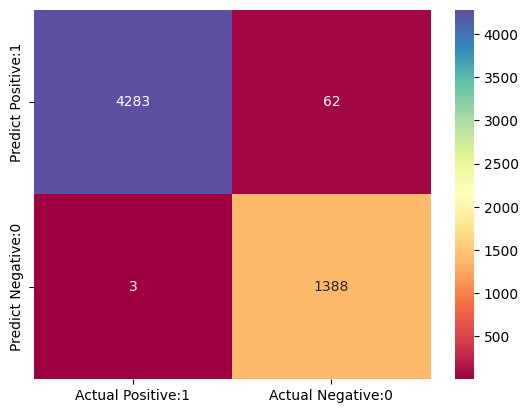

In [ ]:
# Getting the confusion matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1','Actual Negative:0'],
                         index=['Predict Positive:1','Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Spectral')

Text(0, 0.5, 'True Positive Rate (Sensitivity)')

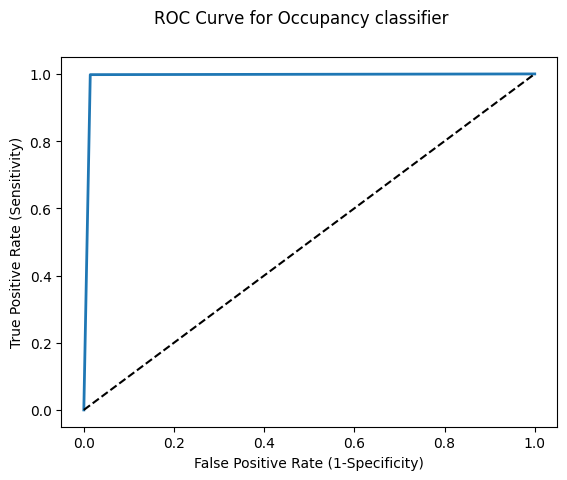

In [ ]:
# Plotting the ROC Curve and getting the ROC-AUC Score
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1) # Using train variables
plt.plot(fpr, tpr, linewidth = 2)
plt.plot([0,1], [0,1], 'k--')
plt.suptitle('ROC Curve for Occupancy classifier')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
# The ROC Curve is ideal as even if the threshold is low, the result is still almost 1

In [ ]:
# Computing the roc-auc score
print(roc_auc_score(y_test, y_pred))
# The area under the ROC Curve is high, which is consistent with the previous metrics
# of an accurate model

0.9917870015941705


In [ ]:
# Determine the best parameter using grid search
# SVC has different parameters available https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1,1, 10, 100, 1000],
    'gamma': [1,0.1,0.01,0.001,0.0001],
    'kernel': ['rbf', 'sigmoid']
    }

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3, cv=3)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV 1/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.987 total time=   0.8s
[CV 2/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.988 total time=   0.7s
[CV 3/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.988 total time=   0.7s
[CV 1/3] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.818 total time=   2.3s
[CV 2/3] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.813 total time=   2.7s
[CV 3/3] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.812 total time=   2.1s
[CV 1/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.987 total time=   0.3s
[CV 2/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.988 total time=   0.4s
[CV 3/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.986 total time=   0.4s
[CV 1/3] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.959 total time=   0.7s
[CV 2/3] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.960 total time=   0.8s
[CV 3/3] END ..C=0.1, gamma=0.1, kernel=sigmoid

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=3)

In [ ]:
# Getting the best parameters
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [ ]:
y_grid_pred = grid.predict(X_test)

# Getting the accuracy score
print(accuracy_score(y_test, y_grid_pred))
# Getting the roc-auc score
print(roc_auc_score(y_test, y_grid_pred))
# Getting the classification report
print(classification_report(y_test, y_grid_pred))

# The results show that with the parameters given by GridSearchCV,
# The accuracy score and the roc-auc score wer better but only by a small margin (0.001)
# But the classification report metrics were the same

0.9893654114365411
0.9910254066293341
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4345
           1       0.96      0.99      0.98      1391

    accuracy                           0.99      5736
   macro avg       0.98      0.99      0.99      5736
weighted avg       0.99      0.99      0.99      5736



Conclusion:

I conclude that Support Vector Machines work by generating a line which divides the classes into groups, and its optimal solution is to find the maximum plane generated by that dividing line before it reaches a datapoint. There are different paramaters available in SVMs and in using GridSearchCV, we can find the best set of parameters to get the highest accuracy score. In the supplementary activity, I noticed that SVM worked a bit better compared to KNN in classifying the given dataset.